In [58]:
#Load of ionosphere data set
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np

url = "final_data.csv"
df= pd.read_csv(url)
df.head()

,FG%,3PA,2P%,eFG%,ORB,DRB,TRB,BLK,Proximity
0,0.439,2.1,0.468,0.486,2.0,4.5,6.5,0.6,0
1,0.547,0.0,0.548,0.547,4.6,5.4,10.0,0.8,0
2,0.557,0.1,0.562,0.557,2.4,7.6,10.1,0.8,0
3,0.402,1.5,0.560,0.424,1.0,1.7,2.7,0.3,0
4,0.550,1.0,0.578,0.566,1.6,3.9,5.5,1.0,0


In [59]:
X = df.drop('Proximity', axis=1)
y = df['Proximity']

print(X.shape)
print(y.shape)

(794, 8)
(794,)


### Normal dataset cross validation (testing)

[[169 113]
 [ 52 460]]
0.792191435768262


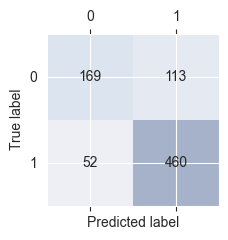

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       282
           1       0.80      0.90      0.85       512

    accuracy                           0.79       794
   macro avg       0.78      0.75      0.76       794
weighted avg       0.79      0.79      0.79       794



In [60]:
# Train on data. No parameters to adjust
import sklearn
from sklearn.naive_bayes import GaussianNB       ### Because continuous data
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.neighbors as nb
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cv = StratifiedKFold(n_splits=10, random_state=5, shuffle=True)

gnb = GaussianNB()
cv_scores = cross_val_score(gnb,X=X,y=y,cv=cv)
np.mean(cv_scores)

predicted = cross_val_predict(GaussianNB(), X=X, y=y,  cv=cv)

print(confusion_matrix(y, predicted))
print(accuracy_score(y, predicted))

confmat = sklearn.metrics.confusion_matrix(y, predicted)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrixNB_cross.png', dpi=600)
plt.show()

print(classification_report(y, predicted))


## Adjusting probability threshold (testing)

In [61]:
(X_train, X_test,  y_train, y_test) = train_test_split(X, y, test_size=.3, random_state=5)

In [62]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

def filterp(th,ProbClass1):
    """ Given a treshold "th" and a set of probabilies of belonging to class 1 "ProbClass1", return predictions """
    y=np.zeros(ProbClass1.shape[0])
    for i,v in enumerate(ProbClass1):
        if ProbClass1[i]>th:
            y[i]=1
    return y

clf = GaussianNB()
lth=[]

# We do a 10 fold crossvalidation with 10 iterations
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

for train_index, test_index in kf.split(X_train, y_train):
    X_train2, X_test2 = X.iloc[train_index], X.iloc[test_index]
    y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]

    # Train with the training data of the iteration
    clf.fit(X_train2, y_train2)
    # Obtaining probablity predictions for test data of the iterarion
    probs = clf.predict_proba(X_test2)
    # Collect probabilities of belonging to class 1
    ProbClass1 = probs[:,1]
    # Sort probabilities and generate pairs (threshold, f1-for-that-threshold)
    res = np.array([[th,f1_score(y_test2,filterp(th,ProbClass1),pos_label=1)] for th in np.sort(ProbClass1)])

    # Uncomment the following lines if you want to plot at each iteration how f1-score evolves increasing the threshold
    #plt.plot(res[:,0],res[:,1])
    #plt.show()

    # Find the threshold that has maximum value of f1-score
    maxF = np.max(res[:,1])
    pl = np.argmax(res[:,1])
    optimal_th = res[pl,0]

    # Store the optimal threshold found for the current iteration
    lth.append(optimal_th)

# Compute the average threshold for all 10 iterations
thdef = np.mean(lth)
print("Selected threshold in 10-fold cross validation:", thdef)
print()

Selected threshold in 10-fold cross validation: 0.43038913682535906



In [63]:
# Train a classifier with the whole training data
clf = GaussianNB()
clf.fit(X_train, y_train)
# Obtain probabilities for data on test set
probs = clf.predict_proba(X_test)
# Generate predictions using probabilities and threshold found on 10 folds cross-validation
probs

array([[2.34999712e-01, 7.65000288e-01],
       [3.19522100e-03, 9.96804779e-01],
       [2.66893040e-02, 9.73310696e-01],
       [2.35625538e-03, 9.97643745e-01],
       [9.99717990e-01, 2.82009766e-04],
       [9.97005819e-01, 2.99418058e-03],
       [9.45704708e-01, 5.42952920e-02],
       [9.63007811e-01, 3.69921893e-02],
       [9.63717466e-02, 9.03628253e-01],
       [9.52246257e-01, 4.77537427e-02],
       [4.97475193e-02, 9.50252481e-01],
       [9.99324217e-01, 6.75783059e-04],
       [3.97499316e-02, 9.60250068e-01],
       [1.54855798e-01, 8.45144202e-01],
       [2.76157422e-01, 7.23842578e-01],
       [3.14216130e-02, 9.68578387e-01],
       [4.89509965e-02, 9.51049003e-01],
       [1.29901138e-02, 9.87009886e-01],
       [9.99999834e-01, 1.66371754e-07],
       [3.32327650e-04, 9.99667672e-01],
       [4.09725647e-01, 5.90274353e-01],
       [2.93271369e-02, 9.70672863e-01],
       [5.14083289e-03, 9.94859167e-01],
       [4.70736041e-03, 9.95292640e-01],
       [6.250869

[[ 55  35]
 [  7 142]]


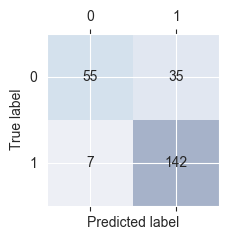

0.8242677824267782
              precision    recall  f1-score   support

           0       0.89      0.61      0.72        90
           1       0.80      0.95      0.87       149

    accuracy                           0.82       239
   macro avg       0.84      0.78      0.80       239
weighted avg       0.83      0.82      0.82       239



In [66]:
pred = filterp(thdef,probs[:,1])
# Print results with this prediction vector
print(confusion_matrix(y_test, pred))
confmat = sklearn.metrics.confusion_matrix(y_test, pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrixNB_fit_thres.png', dpi=600)
plt.show()
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

# Ignore warnings explaining that in some iterations f1 score is 0

### Normal dataset fit (testing)

[[ 55  35]
 [ 10 139]]


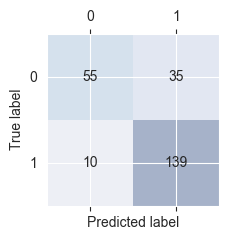

0.8117154811715481
              precision    recall  f1-score   support

           0       0.85      0.61      0.71        90
           1       0.80      0.93      0.86       149

    accuracy                           0.81       239
   macro avg       0.82      0.77      0.79       239
weighted avg       0.82      0.81      0.80       239



In [67]:
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
confmat = sklearn.metrics.confusion_matrix(y_test, pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrixNB_fit.png', dpi=600)
plt.show()
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

### Balanced dataset

In [68]:
url = "../data/final_data_balanced.csv"
df2= pd.read_csv(url)

X = df2.drop('Proximity', axis=1)
y = df2['Proximity']

print(X.shape)
print(y.shape)
(X_train_b, X_test_b,  y_train_b, y_test_b) = train_test_split(X, y, test_size=.3, random_state=5)

(564, 8)
(564,)


## Fit

[[48 23]
 [ 6 93]]


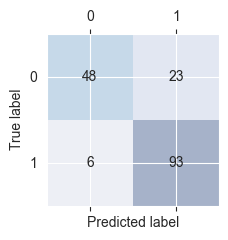

0.8294117647058824
              precision    recall  f1-score   support

           0       0.89      0.68      0.77        71
           1       0.80      0.94      0.87        99

    accuracy                           0.83       170
   macro avg       0.85      0.81      0.82       170
weighted avg       0.84      0.83      0.82       170



In [69]:
clf = GaussianNB()

clf.fit(X_train_b,y_train_b)

y_pred_b = clf.predict(X_test_b)

print(confusion_matrix(y_test_b, y_pred_b))
confmat = sklearn.metrics.confusion_matrix(y_test_b, y_pred_b)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrixNB2_fit.png', dpi=600)
plt.show()

print(accuracy_score(y_test_b, y_pred_b))
print(classification_report(y_test_b, y_pred_b))

## Cross

[[183  99]
 [ 33 249]]
0.7659574468085106


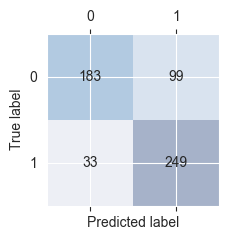

              precision    recall  f1-score   support

           0       0.85      0.65      0.73       282
           1       0.72      0.88      0.79       282

    accuracy                           0.77       564
   macro avg       0.78      0.77      0.76       564
weighted avg       0.78      0.77      0.76       564



In [70]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

gnb = GaussianNB()
cv_scores = cross_val_score(gnb,X=X,y=y,cv=cv)
np.mean(cv_scores)

predicted = cross_val_predict(GaussianNB(), X=X, y=y,  cv=cv)

print(confusion_matrix(y, predicted))
print(accuracy_score(y, predicted))

confmat = sklearn.metrics.confusion_matrix(y, predicted)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrixNB2_cross.png', dpi=600)
plt.show()

print(classification_report(y, predicted))

### Unbalanced dataset

In [71]:
url = "final_data.csv"
df3= pd.read_csv(url)

X = df3.drop('Proximity', axis=1)
y = df3['Proximity']

print(X.shape)
print(y.shape)
(X_train_a, X_test_a,  y_train_a, y_test_a) = train_test_split(X, y, test_size=.3, random_state=5)

(794, 8)
(794,)


## Fit

[[ 55  35]
 [ 10 139]]


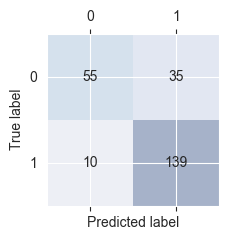

0.8117154811715481
              precision    recall  f1-score   support

           0       0.85      0.61      0.71        90
           1       0.80      0.93      0.86       149

    accuracy                           0.81       239
   macro avg       0.82      0.77      0.79       239
weighted avg       0.82      0.81      0.80       239



In [72]:
clf = GaussianNB()

clf.fit(X_train_a,y_train_a)

y_pred_a = clf.predict(X_test_a)

print(confusion_matrix(y_test_a, y_pred_a))
confmat = sklearn.metrics.confusion_matrix(y_test_a, y_pred_a)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrixNB_fit.png', dpi=600)
plt.show()

print(accuracy_score(y_test_a, y_pred_a))
print(classification_report(y_test_a, y_pred_a))

## Cross

[[169 113]
 [ 52 460]]
0.792191435768262


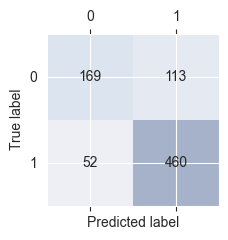

              precision    recall  f1-score   support

           0       0.76      0.60      0.67       282
           1       0.80      0.90      0.85       512

    accuracy                           0.79       794
   macro avg       0.78      0.75      0.76       794
weighted avg       0.79      0.79      0.79       794



In [77]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

gnb = GaussianNB()
cv_scores = cross_val_score(gnb,X=X,y=y,cv=cv)
np.mean(cv_scores)

predicted = cross_val_predict(GaussianNB(), X=X, y=y,  cv=cv)

print(confusion_matrix(y, predicted))
print(accuracy_score(y, predicted))

confmat = sklearn.metrics.confusion_matrix(y, predicted)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('ConMatrixNB_cross.png', dpi=600)
plt.show()

print(classification_report(y, predicted))